This notebook is an outsample test we got for vdisc dataset. Generally, it got about 65% acc. :(

# Import Packages and Data

In [1]:
import numpy as np
np.random.seed(1248)

In [2]:
import tensorflow
import keras
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import pickle
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

Using TensorFlow backend.


In [3]:
data = pd.read_csv('../data/vdisc_train_buffer_over_data_small.csv.gz')
labels = data.copy()
del labels['Unnamed: 0']
del labels['filename']
del labels['code']
del labels['flaw_loc']
labels = labels.drop_duplicates().sort_values('testcase_ID').reset_index(drop=True)

In [4]:
x = pd.read_csv("../data/vdisc_embedding.csv")
x['testcase_ID'] = x['type']
del x['type']
x = x.sort_values("testcase_ID")

In [5]:
y = labels['buffer']
x = x.drop('testcase_ID', axis='columns')

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
x_test.shape

(5746, 128)

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [10]:
with open('../data/dense-model-binary','rb') as f:
    model = pickle.load(f)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
nn_evaluate = model.evaluate(x_test,y_test)

5746/5746 [==============================] - 0s 37us/step


In [12]:
nn_score = nn_evaluate[1]

In [13]:
nn_score

0.505395057452003

In [14]:
y_pred = model.predict_classes(x)

In [15]:
import seaborn as sns
from sklearn import metrics
import matplotlib

In [16]:
y_predict = model.predict(x_test)

## Visualisations

In [17]:
import numpy as np
from matplotlib.colors import LogNorm

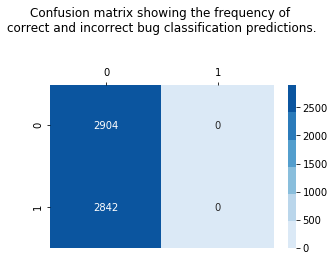

In [18]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_predict)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [24]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_predict)).flatten().tolist()

fpr_nn = fp/(fp+tp)
fnr_nn = fn/(fn+tn)

In [27]:
fpr_nn

0.0394990366088632

In [26]:
fnr_nn

0.06247191011235955

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [20]:
rf.score(x_test, y_test)

0.14304878361860562

In [28]:
y_pred_rf = pd.DataFrame(rf.predict(x_test))
y_pred_rf = y_pred_rf.set_index(y_test.index)

In [29]:
bin_y_pred_rf = np.rint(y_pred_rf)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
rf_accuracy = accuracy_score(y_test, np.rint(y_pred_rf))

In [32]:
from sklearn import metrics
import matplotlib
from matplotlib import pyplot
import seaborn as sns

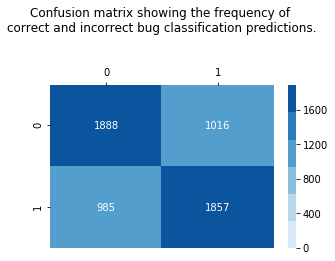

In [33]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_rf)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [34]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_rf)).flatten().tolist()

fpr_rf = fp/(fp+tp)
fnr_rf = fn/(fn+tn)

# KNN

## 1NN

In [35]:
from sklearn.neighbors import KNeighborsClassifier 

oneknn = KNeighborsClassifier(n_neighbors=1, algorithm = 'kd_tree', weights = 'distance')
oneknn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [36]:
y_pred_oneknn = pd.DataFrame(oneknn.predict(x_test))
y_pred_oneknn = y_pred_oneknn.set_index(y_test.index)

In [37]:
oneknn_score=oneknn.score(x_test,y_test)

In [38]:
oneknn_score

0.6059867734075879

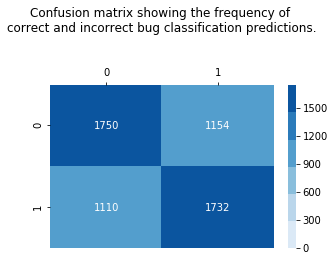

In [39]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_oneknn)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [40]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_oneknn)).flatten().tolist()

fpr_onenn = fp/(fp+tp)
fnr_onenn = fn/(fn+tn)

2NN returns the same as one

## 3NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier 

threeknn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
threeknn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [42]:
y_pred_threeknn = pd.DataFrame(threeknn.predict(x_test))

In [43]:
y_pred_threeknn = y_pred_threeknn.set_index(y_test.index)

In [44]:
threeknn_score=threeknn.score(x_test,y_test)

In [45]:
threeknn_score

0.6197354681517577

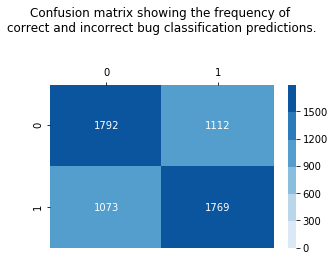

In [46]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_threeknn)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [47]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_threeknn)).flatten().tolist()

fpr_threenn = fp/(fp+tp)
fnr_threenn = fn/(fn+tn)

## Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

In [49]:
total_error = (y_test != y_pred_gnb).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 5746 points : 2132
Accuracy 0.6289592760180995


In [50]:
gnb_score = 1- (total_error/x_test.shape[0])

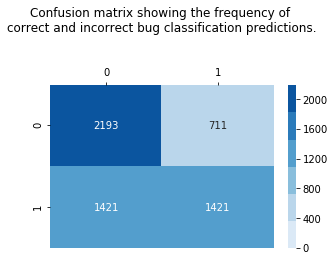

In [51]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_gnb)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [52]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_gnb)).flatten().tolist()

fpr_gnb = fp/(fp+tp)
fnr_gnb = fn/(fn+tn)

## SVM



In [53]:
from sklearn import svm
clf_svm = svm.SVC(kernel = 'poly', gamma='scale', degree = 3)
clf_svm.fit(x_train, y_train)  

y_pred_svm = clf_svm.predict(x_test)

In [54]:
total_error = (y_test != y_pred_svm).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 5746 points : 2022
Accuracy 0.6481030281935259


In [55]:
svm_score = 1- (total_error/x_test.shape[0])

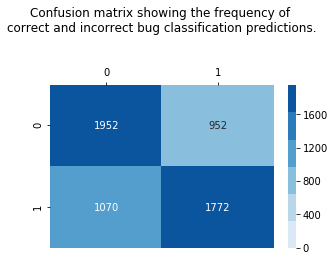

In [56]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_svm)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [57]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_svm)).flatten().tolist()

fpr_svm = fp/(fp+tp)
fnr_svm = fn/(fn+tn)

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression(penalty = 'l1')
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred_lr = logreg.predict(x_test)
print('Accuracy ' + str(logreg.score(x_test, y_test)))

Accuracy 0.6451444483118691


In [61]:
logreg_accuracy = logreg.score(x_test, y_test)

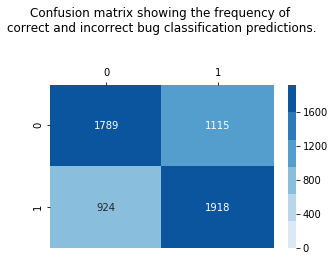

In [62]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_lr)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [63]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_lr)).flatten().tolist()

fpr_logreg = fp/(fp+tp)
fnr_logreg = fn/(fn+tn)

# AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [65]:
clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [66]:
y_pred_ab = clf_ab.predict(x_test)
# y_pred = y_pred.reshape(-1,1)
# y_pred.shape

In [67]:
total_error = (y_test != y_pred_ab).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 5746 points : 2029
Accuracy 0.6468847894187261


In [68]:
ab_accuracy = 1-(total_error/x_test.shape[0])

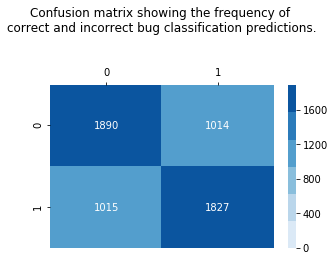

In [69]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_ab)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [70]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_ab)).flatten().tolist()

fpr_ab = fp/(fp+tp)
fnr_ab = fn/(fn+tn)

# XGBoost

In [71]:
!pip install xgboost

     |################################| 142.8MB 122kB/s eta 0:00:013    |##                              | 10.6MB 14.1MB/s eta 0:00:10     |##                              | 10.9MB 14.1MB/s eta 0:00:10     |##                              | 13.1MB 14.1MB/s eta 0:00:10     |###                             | 13.5MB 14.1MB/s eta 0:00:10     |###                             | 14.3MB 3.9MB/s eta 0:00:34     |########                        | 38.5MB 6.9MB/s eta 0:00:16     |########                        | 38.9MB 6.9MB/s eta 0:00:16     |#########                       | 44.1MB 8.8MB/s eta 0:00:12     |##########                      | 45.6MB 8.8MB/s eta 0:00:12     |##########                      | 47.1MB 8.8MB/s eta 0:00:11     |###########                     | 49.4MB 7.1MB/s eta 0:00:14     |############                    | 55.3MB 6.1MB/s eta 0:00:15     |############                    | 57.0MB 6.1MB/s eta 0:00:15     |#############                   | 59.8MB 6.1MB/s eta 0:00:14     

In [72]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model_xgb.fit(x_train, y_train)
model_xgb.score(x_test,y_test)

0.6435781413156979

In [73]:
y_pred_xgb = model_xgb.predict(x_test)

In [74]:
total_error = (y_test != y_pred_xgb).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 5746 points : 2048
Accuracy 0.6435781413156978


In [75]:
xgb_accuracy = 1- (total_error/x_test.shape[0])

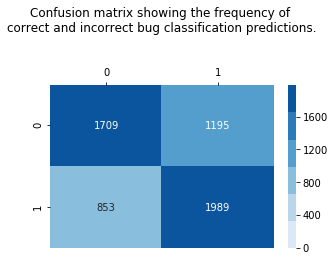

In [76]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_xgb)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [77]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_xgb)).flatten().tolist()

fpr_xgb = fp/(fp+tp)
fnr_xgb = fn/(fn+tn)

# Table of Results

In [78]:
results = {'Model': ['Neural Network', 'Random Forest', '1 Nearest Neighbour', '3 Nearest Neighbours', 'Gaussian Naive Bayes', 'SVM', 'Logistic Regression', 'AdaBoost', 'XGBoost'], 
           'Accuracy' : [nn_score, rf_accuracy, oneknn_score, threeknn_score, gnb_score, svm_score, logreg_accuracy, ab_accuracy, xgb_accuracy],
          'FPR' : [fpr_nn,fpr_rf,fpr_onenn,fpr_threenn,fpr_gnb,fpr_svm,fpr_logreg,fpr_ab,fpr_xgb],
          'FNR' : [fnr_nn,fnr_rf,fnr_onenn,fnr_threenn,fnr_gnb,fnr_svm,fnr_logreg,fnr_ab,fnr_xgb]}
accuracy_table = pd.DataFrame(data = results)

NameError: name 'fpr_nn' is not defined

In [ ]:
accuracy_table.sort_values(by = ['Accuracy'], ascending=False)

For T-SNE visualisations:

In [ ]:
true_labels = pd.DataFrame(y_test +0)

In [ ]:
pred_compare = pd.DataFrame()
pred_compare['true_label'] = true_labels['bug']
pred_compare['neuralnet'] = np.rint(y_predict).astype(int)
pred_compare['rf'] = np.rint(y_pred_rf).astype(int)
pred_compare['1nn'] = np.rint(y_pred_oneknn).astype(int)
pred_compare['3nn'] = np.rint(y_pred_threeknn).astype(int)
pred_compare['gnb'] = np.rint(y_pred_gnb).astype(int)
pred_compare['svm'] = np.rint(y_pred_svm).astype(int)
pred_compare['logreg'] = np.rint(y_pred_lr).astype(int)
pred_compare['ab'] = np.rint(y_pred_ab).astype(int)
pred_compare['xgb'] = np.rint(y_pred_xgb).astype(int)

In [ ]:
pred_compare.to_csv('../data/compare_predictions.csv.gz')

# Stacking

In [82]:
!pip install vecstack

  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack
You should consider upgrading via the 'pip install --upgrade pip' command.


In [83]:
from vecstack import stacking

### Model 1 : Stacking SVM and Logistic Regression

In [84]:
models1 = [clf_svm, logreg]

In [85]:
S_train, S_test = stacking(models1,                   
                           x_train, y_train, x_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [SVC]
    fold  0:  [0.63557257]
    fold  1:  [0.65158371]
    fold  2:  [0.64891210]
    fold  3:  [0.64560487]
    ----
    MEAN:     [0.64541831] + [0.00606614]
    FULL:     [0.64541815]

model  1:     [LogisticRegression]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.63748695]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.66063348]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.65221932]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.64664926]
    ----
    MEAN:     [0.64924725] + [0.00841923]
    FULL:     [0.64924724]



In [86]:
level_two1 = clf_svm.fit(S_train, y_train)
y_pred_stack1 = level_two1.predict(S_test)

In [87]:
print('Final prediction score for model1: [%.8f]' % accuracy_score(y_test, np.rint(y_pred_stack1)))

Final prediction score for model1: [0.64618865]


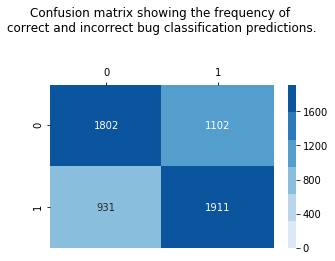

In [88]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_stack1)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [89]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_stack1)).flatten().tolist()

fpr_stack1 = fp/(fp+tp)
fnr_stack1 = fn/(fn+tn)

In [90]:
fpr_stack1

0.3657484234981746

In [91]:
fnr_stack1

0.340651298938895

In [92]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve, matthews_corrcoef, f1_score, roc_auc_score
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, np.rint(y_pred_stack1))
precision, recall, thresholds = precision_recall_curve(y_test, np.rint(y_pred_stack1))

In [93]:
auc_keras = auc(fpr_keras, tpr_keras)
roc_auc = roc_auc_score(y_test, np.rint(y_pred_stack1))
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, np.rint(y_pred_stack1))
mcc = matthews_corrcoef(y_test, np.rint(y_pred_stack1))

In [94]:
print('PR AUC: %.3f' % pr_auc)
print('ROC AUC: %.3f' % roc_auc)
print('MCC: %.3f' % mcc)
print('F1: %.3f' % f1)

PR AUC: 0.734
ROC AUC: 0.646
MCC: 0.293
F1: 0.653


### Model 2 : Adding in 1-Nearest Neighbour

In [95]:
models2 = [clf_svm, logreg, oneknn]

In [96]:
S_train, S_test = stacking(models2,                   
                           x_train, y_train, x_test, #v disc testing,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVC]
    fold  0:  [0.63557257]
    fold  1:  [0.65158371]
    fold  2:  [0.64891210]
    fold  3:  [0.64560487]
    ----
    MEAN:     [0.64541831] + [0.00606614]
    FULL:     [0.64541815]

model  1:     [LogisticRegression]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.63731291]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.66063348]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.65204526]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.64595300]
    ----
    MEAN:     [0.64898616] + [0.00852178]
    FULL:     [0.64898616]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.58997564]
    fold  1:  [0.60389836]
    fold  2:  [0.59216710]
    fold  3:  [0.60087032]
    ----
    MEAN:     [0.59672786] + [0.00580881]
    FULL:     [0.59672787]



In [97]:
level_two2 = clf_svm.fit(S_train, y_train)
y_pred_stack2 = level_two2.predict(S_test)

In [98]:
print('Final prediction score for model2: [%.8f]' % accuracy_score(y_test, np.rint(y_pred_stack2)))

Final prediction score for model2: [0.64914723]


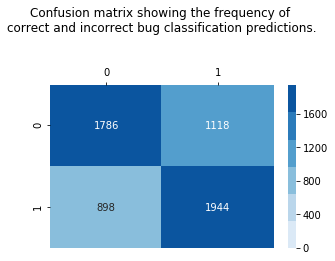

In [99]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_stack2)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [100]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_stack2)).flatten().tolist()

fpr_stack2 = fp/(fp+tp)
fnr_stack2 = fn/(fn+tn)

In [101]:
fpr_stack2

0.3651208360548661

In [102]:
fnr_stack2

0.334575260804769

In [103]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, np.rint(y_pred_stack2))
precision, recall, thresholds = precision_recall_curve(y_test, np.rint(y_pred_stack2))

In [104]:
auc_keras = auc(fpr_keras, tpr_keras)
roc_auc = roc_auc_score(y_test, np.rint(y_pred_stack2))
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, np.rint(y_pred_stack2))
mcc = matthews_corrcoef(y_test, np.rint(y_pred_stack2))

In [105]:
print('PR AUC: %.3f' % pr_auc)
print('ROC AUC: %.3f' % roc_auc)
print('MCC: %.3f' % mcc)
print('F1: %.3f' % f1)

PR AUC: 0.738
ROC AUC: 0.650
MCC: 0.300
F1: 0.659


### Stack Layer Above (Model 2) and Convolutional Neural Network

In [106]:
from keras.layers import RepeatVector, Permute, Lambda, ActivityRegularization, AveragePooling1D
from keras.optimizers import Nadam, Adagrad
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, Conv2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop, Adadelta, Adam

In [107]:
conv_model_stack = Sequential()

conv_model_stack.add(Dense(128, input_dim=3, activation='sigmoid'))
conv_model_stack.add(RepeatVector(3))

conv_model_stack.add(Conv1D(filters = 64, kernel_size = 3, strides = 1, activation ='sigmoid'))
conv_model_stack.add(Dropout(0.5))
conv_model_stack.add(MaxPooling1D(pool_size = 2, padding = 'same'))

conv_model_stack.add(Flatten())

conv_model_stack.add(Lambda(lambda x: x**2))
conv_model_stack.add(Dense(128, activation='sigmoid'))
conv_model_stack.add(Dropout(0.05))

conv_model_stack.add(Dense(units=1, activation='sigmoid'))

conv_model_stack.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             24640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
___________________________

In [108]:
conv_model_stack.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
conv_model_stack.fit(S_train, y_train, epochs=50, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
22982/22982 [==============================] - 1s 52us/step - loss: 0.6698 - acc: 0.5875
Epoch 2/50
22982/22982 [==============================] - 1s 45us/step - loss: 0.6504 - acc: 0.6404
Epoch 3/50
22982/22982 [==============================] - 1s 45us/step - loss: 0.6481 - acc: 0.6428
Epoch 4/50
22982/22982 [==============================] - 1s 46us/step - loss: 0.6472 - acc: 0.6443
Epoch 5/50
22982/22982 [==============================] - 1s 45us/step - loss: 0.6465 - acc: 0.6469
Epoch 6/50
22982/22982 [==============================] - 1s 45us/step - loss: 0.6459 - acc: 0.6479
Epoch 7/50
22982/22982 [==============================] - 1s 46us/step - loss: 0.6459 - acc: 0.6485
Epoch 8/50
22982/22982 [==============================] - 1s 47us/step - loss: 0.6439 - acc: 0.6494
Epoch 9/50
22982/22982 [==============================] - 1s 57us/step - loss: 0.6442 - acc: 0.6494
Epoch 10/50
22982/22982 [===========================

In [110]:
y_pred_stack_conv = conv_model_stack.predict(S_test)

In [111]:
conv_model_stack.evaluate(S_test,y_test)

5746/5746 [==============================] - 0s 34us/step


[0.6386029740015555, 0.6526279150506075]

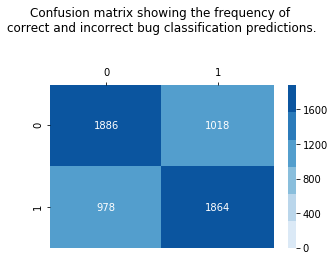

In [112]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_stack_conv)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [113]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_stack_conv)).flatten().tolist()

fpr_stack_conv = fp/(fp+tp)
fnr_stack_conv = fn/(fn+tn)

In [114]:
fpr_stack_conv

0.3532269257460097

In [115]:
fnr_stack_conv

0.3414804469273743

In [116]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, np.rint(y_pred_stack_conv))
precision, recall, thresholds = precision_recall_curve(y_test, np.rint(y_pred_stack_conv))

In [117]:
auc_keras = auc(fpr_keras, tpr_keras)
roc_auc = roc_auc_score(y_test, np.rint(y_pred_stack_conv))
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, np.rint(y_pred_stack_conv))
mcc = matthews_corrcoef(y_test, np.rint(y_pred_stack_conv))

In [118]:
print('PR AUC: %.3f' % pr_auc)
print('ROC AUC: %.3f' % roc_auc)
print('MCC: %.3f' % mcc)
print('F1: %.3f' % f1)

PR AUC: 0.736
ROC AUC: 0.653
MCC: 0.305
F1: 0.651


## RF to CNN

In [119]:
y_pred_rf_s = pd.DataFrame(rf.predict(x_train))
y_pred_rf_s = y_pred_rf_s.set_index(y_train.index)
y_pred_rf_s = np.rint(y_pred_rf_s)

In [120]:
conv_model_stack_1 = Sequential()

conv_model_stack_1.add(Dense(128, input_dim=1, activation='sigmoid'))
conv_model_stack_1.add(RepeatVector(3))

conv_model_stack_1.add(Conv1D(filters = 64, kernel_size = 3, strides = 1, activation ='sigmoid'))
conv_model_stack_1.add(Dropout(0.5))
conv_model_stack_1.add(MaxPooling1D(pool_size = 2, padding = 'same'))

conv_model_stack_1.add(Flatten())

conv_model_stack_1.add(Lambda(lambda x: x**2))

conv_model_stack_1.add(Dense(128, activation='sigmoid'))
conv_model_stack_1.add(Dropout(0.05))

conv_model_stack_1.add(Dense(units=1, activation='sigmoid'))

conv_model_stack_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               256       
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 64)             24640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 64)                0         
__________

In [121]:
conv_model_stack_1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
conv_model_stack_1.fit(y_pred_rf_s, y_train, epochs=50, batch_size=64)

Epoch 1/50
22982/22982 [==============================] - 1s 56us/step - loss: 0.3283 - acc: 0.8278
Epoch 2/50
22982/22982 [==============================] - 1s 41us/step - loss: 0.0032 - acc: 1.0000
Epoch 3/50
22982/22982 [==============================] - 1s 41us/step - loss: 0.0010 - acc: 1.0000
Epoch 4/50
22982/22982 [==============================] - 1s 41us/step - loss: 5.5445e-04 - acc: 1.0000
Epoch 5/50
22982/22982 [==============================] - 1s 45us/step - loss: 3.5900e-04 - acc: 1.0000
Epoch 6/50
22982/22982 [==============================] - 1s 46us/step - loss: 2.5353e-04 - acc: 1.0000
Epoch 7/50
22982/22982 [==============================] - 1s 46us/step - loss: 1.6759e-04 - acc: 1.0000
Epoch 8/50
22982/22982 [==============================] - 1s 46us/step - loss: 1.4490e-04 - acc: 1.0000
Epoch 9/50
22982/22982 [==============================] - 1s 47us/step - loss: 9.6429e-05 - acc: 1.0000
Epoch 10/50
22982/22982 [==============================] - 1s 46us/step - lo

In [123]:
y_pred_stack_rf = conv_model_stack_1.predict(bin_y_pred_rf)

In [124]:
conv_model_stack_1.evaluate(bin_y_pred_rf,y_test)

5746/5746 [==============================] - 0s 48us/step


[5.459371597311283, 0.6517577445179256]

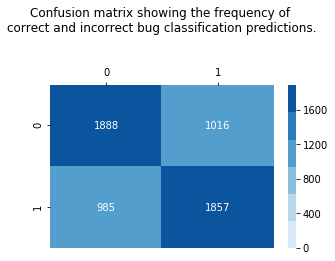

In [125]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_stack_rf)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [126]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_stack_rf)).flatten().tolist()

fpr_stack_rf = fp/(fp+tp)
fnr_stack_rf = fn/(fn+tn)

In [127]:
fpr_stack_rf

0.353637312913331

In [128]:
fnr_stack_rf

0.342847198050818

In [129]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, np.rint(y_pred_stack_rf))
precision, recall, thresholds = precision_recall_curve(y_test, np.rint(y_pred_stack_rf))

In [130]:
auc_keras = auc(fpr_keras, tpr_keras)
roc_auc = roc_auc_score(y_test, np.rint(y_pred_stack_rf))
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, np.rint(y_pred_stack_rf))
mcc = matthews_corrcoef(y_test, np.rint(y_pred_stack_rf))

In [131]:
print('PR AUC: %.3f' % pr_auc)
print('ROC AUC: %.3f' % roc_auc)
print('MCC: %.3f' % mcc)
print('F1: %.3f' % f1)

PR AUC: 0.736
ROC AUC: 0.652
MCC: 0.304
F1: 0.650
